In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data=pd.read_csv("C:\\Athang\\MSc DSA\\Dissertation\\Reading_wind.csv")
data=data.drop(index=0).reset_index(drop=True)
data.head(5)

,TimeStamp,Time,U10,U10max_der
0,20230101,5,3.5,5.5
1,20230101,10,3.5,7.6
2,20230101,15,3.6,6.2
3,20230101,20,3.8,9.3
4,20230101,25,4.2,9.3


In [139]:
data=pd.read_csv("C:\\Athang\\MSc DSA\\Dissertation\\Reading_wind.csv")
data=data.drop(index=0).reset_index(drop=True)
def fix_time(row):
    if row['Time'] == '2400':
        new_date = pd.to_datetime(row['TimeStamp'], format='%Y%m%d') + pd.Timedelta(days=1)
        new_time = '0000'
        return new_date.strftime('%Y%m%d'), new_time
    else:
        return row['TimeStamp'], str(row['Time']).zfill(4)

data[['TimeStamp', 'Time']] = data.apply(fix_time, axis=1, result_type='expand')

# Combine 'TimeStamp' and 'Time' into a single datetime column
data['timestamp'] = pd.to_datetime(data['TimeStamp'] + ' ' + data['Time'], format='%Y%m%d %H%M')
data.set_index('timestamp', inplace=True)
data

,TimeStamp,Time,U10,U10max_der
timestamp,,,,
2023-01-01 00:05:00,20230101,0005,3.5,5.5
2023-01-01 00:10:00,20230101,0010,3.5,7.6
2023-01-01 00:15:00,20230101,0015,3.6,6.2
2023-01-01 00:20:00,20230101,0020,3.8,9.3
2023-01-01 00:25:00,20230101,0025,4.2,9.3
...,...,...,...,...
2023-12-31 22:40:00,20231231,2240,4.2,6.8
2023-12-31 22:45:00,20231231,2245,4.1,7.1
2023-12-31 22:50:00,20231231,2250,4.1,7.1


In [140]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 TimeStamp       0
Time            0
U10           161
U10max_der      0
dtype: int64


In [141]:
data['U10']= pd.to_numeric(data['U10'], errors='coerce')
data['U10max_der']= pd.to_numeric(data['U10max_der'], errors='coerce')


Missing Values:
 TimeStamp       0
Time            0
U10           161
U10max_der      0
dtype: int64


In [144]:
data=data.dropna()
data=data[data['U10']!=0.0]

In [145]:
data[data['U10']==0.0]

,TimeStamp,Time,U10,U10max_der
timestamp,,,,


In [146]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 TimeStamp     0
Time          0
U10           0
U10max_der    0
dtype: int64


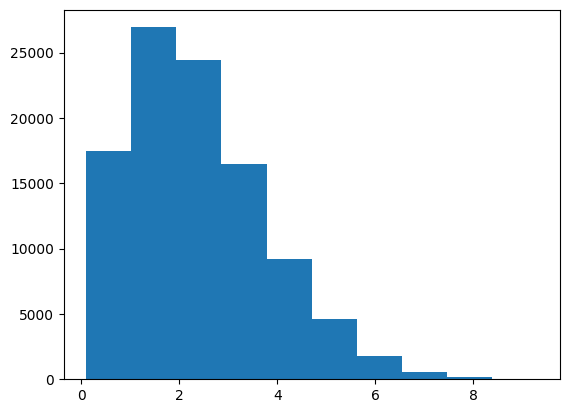

In [147]:
plt.hist(data['U10'])
plt.show()

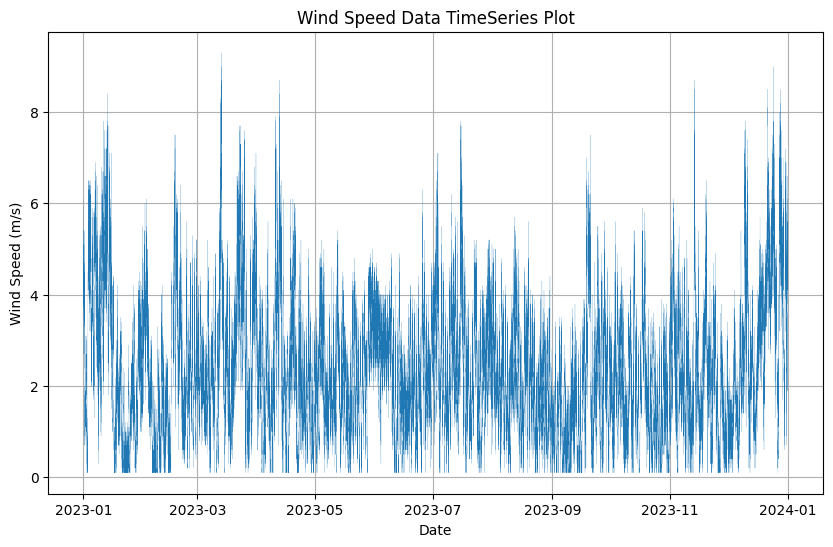

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(data['U10'], linestyle='-',lw=0.1)
plt.title('Wind Speed Data TimeSeries Plot')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

In [149]:
plt.figure(figsize=(12, 6))
sns.heatmap(data['U10'].isnull(), cbar=False, cmap='viridis')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.title('Missing Data Heatmap')
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (101665, 1) and (101665,))

<Figure size 1200x600 with 0 Axes>

In [69]:
# data['U10']=data['U10'].fillna(0)

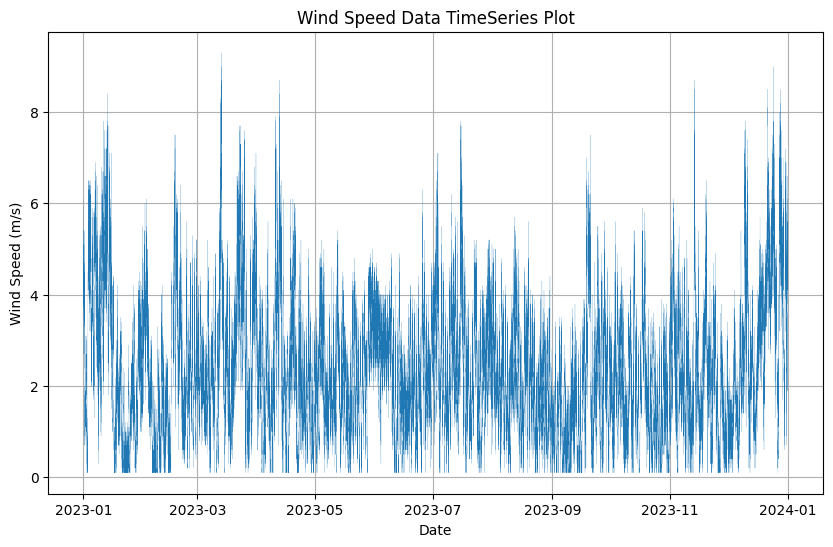

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(data['U10'], linestyle='-',lw=0.1)
plt.title('Wind Speed Data TimeSeries Plot')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

In [118]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 TimeStamp     0
Time          0
U10           0
U10max_der    0
dtype: int64


In [151]:
hourly_avg = data['U10'].resample('H').mean()
hourly_avg_max_der = data['U10max_der'].resample('H').mean()

C:\Users\athan\AppData\Local\Temp\ipykernel_16296\3460835757.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = data['U10'].resample('H').mean()
C:\Users\athan\AppData\Local\Temp\ipykernel_16296\3460835757.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg_max_der = data['U10max_der'].resample('H').mean()


In [152]:
hourly_avg_df = hourly_avg.reset_index()
hourly_avg_df.columns = ['timestamp', 'U10_mean']
hourly_avg_df

,timestamp,U10_mean
0,2023-01-01 00:00:00,4.554545
1,2023-01-01 01:00:00,5.091667
2,2023-01-01 02:00:00,4.766667
3,2023-01-01 03:00:00,4.575000
4,2023-01-01 04:00:00,4.083333
...,...,...
8755,2023-12-31 19:00:00,4.808333
8756,2023-12-31 20:00:00,5.016667
8757,2023-12-31 21:00:00,4.800000
8758,2023-12-31 22:00:00,4.708333


In [153]:
hourly_avg_max_der_df = hourly_avg_max_der.reset_index()
hourly_avg_max_der_df.columns = ['timestamp', 'U10_max']
hourly_avg_max_der_df

,timestamp,U10_max
0,2023-01-01 00:00:00,8.845455
1,2023-01-01 01:00:00,9.116667
2,2023-01-01 02:00:00,8.300000
3,2023-01-01 03:00:00,8.125000
4,2023-01-01 04:00:00,7.358333
...,...,...
8755,2023-12-31 19:00:00,9.108333
8756,2023-12-31 20:00:00,9.225000
8757,2023-12-31 21:00:00,8.700000
8758,2023-12-31 22:00:00,7.950000


In [154]:
hourly_avg_df= pd.concat([hourly_avg,hourly_avg_max_der], axis=1).reset_index()
hourly_avg_df

,timestamp,U10,U10max_der
0,2023-01-01 00:00:00,4.554545,8.845455
1,2023-01-01 01:00:00,5.091667,9.116667
2,2023-01-01 02:00:00,4.766667,8.300000
3,2023-01-01 03:00:00,4.575000,8.125000
4,2023-01-01 04:00:00,4.083333,7.358333
...,...,...,...
8755,2023-12-31 19:00:00,4.808333,9.108333
8756,2023-12-31 20:00:00,5.016667,9.225000
8757,2023-12-31 21:00:00,4.800000,8.700000
8758,2023-12-31 22:00:00,4.708333,7.950000


In [155]:
hourly_avg_df.set_index('timestamp', inplace=True)
print("Basic Statistics:\n", hourly_avg_df.describe())

Basic Statistics:
                U10   U10max_der
count  8692.000000  8692.000000
mean      2.322380     4.346822
std       1.371702     2.496161
min       0.100000     0.000000
25%       1.283333     2.450000
50%       2.133333     3.966667
75%       3.150000     5.841667
max       8.416667    15.525000


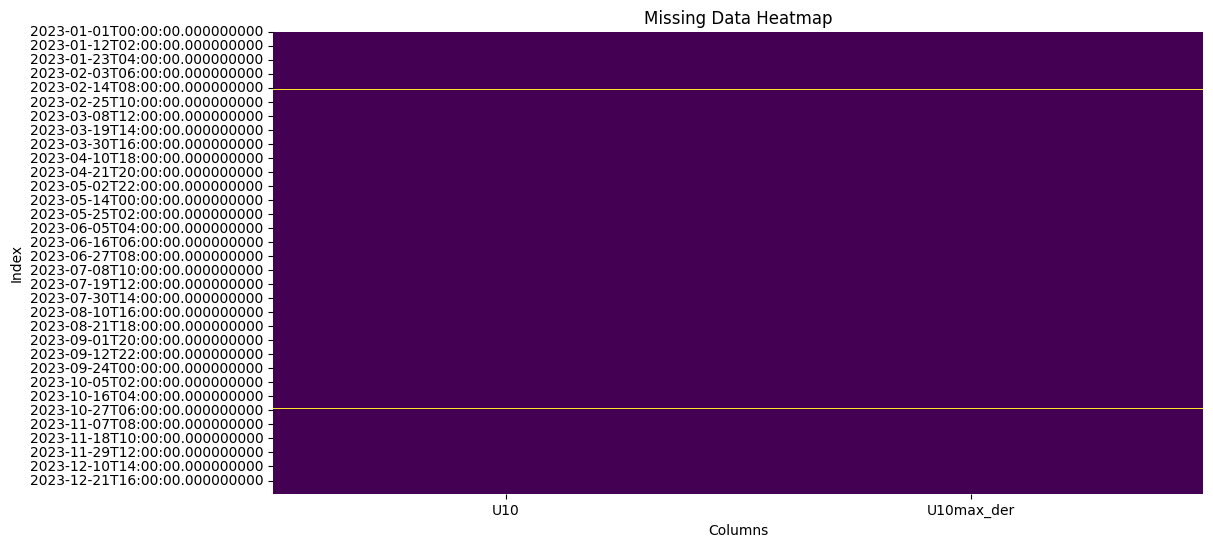

In [156]:
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_avg_df.isnull(), cbar=False, cmap='viridis')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.title('Missing Data Heatmap')
plt.show()

In [157]:
def highlight_missing(s):
    return ['background-color: yellow' if pd.isnull(v) else '' for v in s]

# Apply the highlighting function to the DataFrame
styled_df = hourly_avg_df.style.apply(highlight_missing, subset=['U10'])

# Display the styled DataFrame
styled_df

# Save the styled DataFrame to an HTML file (optional)
styled_df.to_html('Hourly_Average_U10_highlighted.html')

In [158]:
def highlight_missing(s):
    return ['background-color: yellow' if v==0 else '' for v in s]

# Apply the highlighting function to the DataFrame
styled_df = hourly_avg_df.style.apply(highlight_missing, subset=['U10'])

# Display the styled DataFrame
styled_df

# Save the styled DataFrame to an HTML file (optional)
styled_df.to_html('Hourly_Average_U10_highlighted_zeros.html')

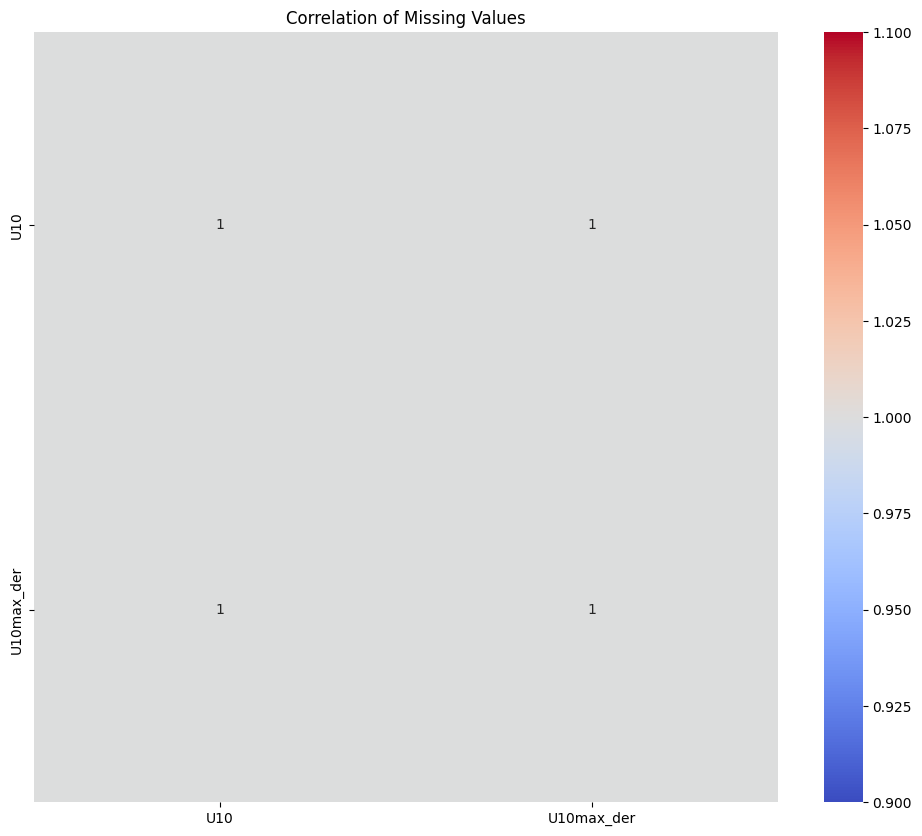

In [159]:
def missing_value_correlation(data):
    miss = data.isnull()
    corr = miss.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation of Missing Values')
    plt.show()

# Example usage
missing_value_correlation(hourly_avg_df)

In [160]:
def missing_patterns(data):
    return data.isnull().sum().sort_values(ascending=False)

# Example usage
patterns = missing_patterns(hourly_avg_df)
print(patterns)

U10           68
U10max_der    68
dtype: int64


In [161]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def predict_missingness(data, column):
    # Create a copy of the dataframe
    df = data.copy()
    
    # Create a binary indicator for missingness in the target column
    df['is_missing'] = df[column].isnull().astype(int)
    
    # Drop the target column
    X = df.drop([column, 'is_missing'], axis=1)
    y = df['is_missing']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a pipeline with imputation, scaling, and logistic regression
    pipeline = make_pipeline(
        IterativeImputer(random_state=42),
        StandardScaler(),
        LogisticRegression(random_state=42)
    )
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Return the score
    return pipeline.score(X_test, y_test)
# Example usage
score = predict_missingness(hourly_avg_df, 'U10')
print(f"Prediction accuracy: {score}")

Prediction accuracy: 0.9937214611872146


In [162]:
import numpy as np
np.mean(hourly_avg_df['U10']), np.var(hourly_avg_df['U10'])

(2.322380197843267, 1.8813507433709762)

In [163]:
hourly_avg_df= hourly_avg_df[hourly_avg_df['U10'] != 0.00]

In [164]:
hourly_avg_df

,U10,U10max_der
timestamp,,
2023-01-01 00:00:00,4.554545,8.845455
2023-01-01 01:00:00,5.091667,9.116667
2023-01-01 02:00:00,4.766667,8.300000
2023-01-01 03:00:00,4.575000,8.125000
2023-01-01 04:00:00,4.083333,7.358333
...,...,...
2023-12-31 19:00:00,4.808333,9.108333
2023-12-31 20:00:00,5.016667,9.225000
2023-12-31 21:00:00,4.800000,8.700000


In [165]:
hourly_avg_df[hourly_avg_df['U10'] <= 0.01]

,U10,U10max_der
timestamp,,


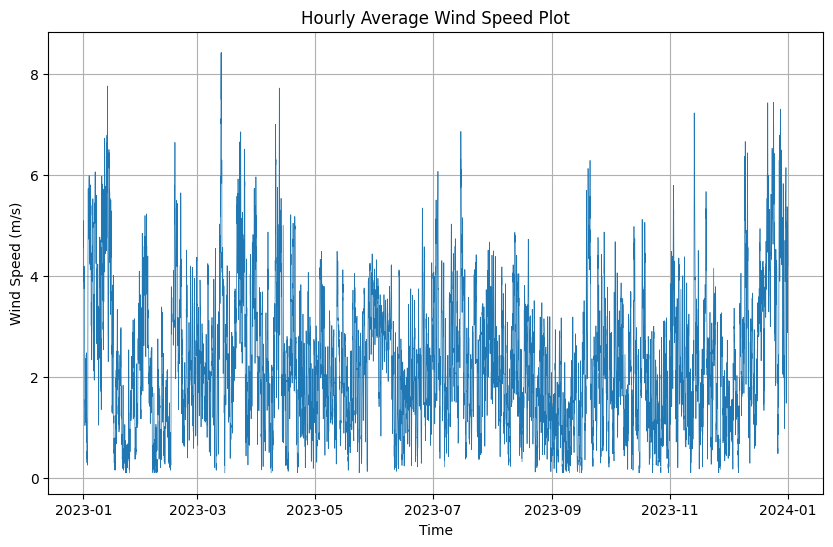

In [166]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_df['U10'], linestyle='-',lw=0.5)
plt.title('Hourly Average Wind Speed Plot')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

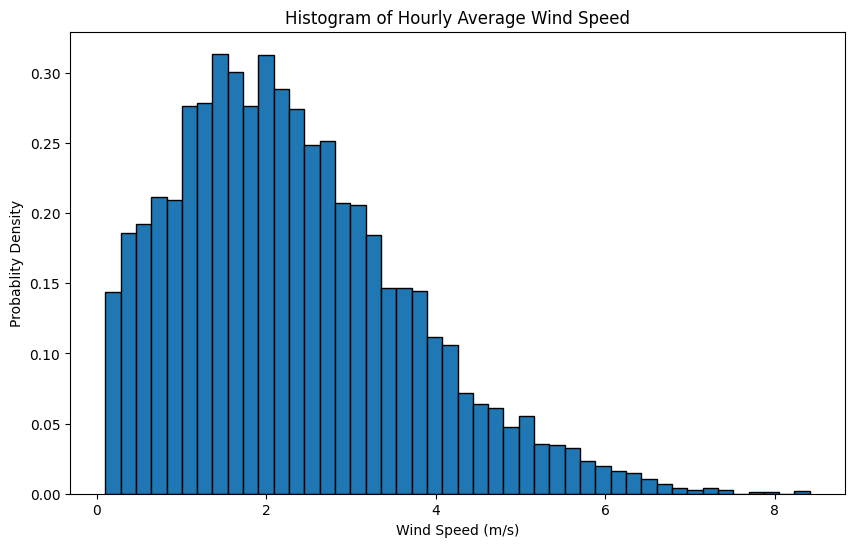

In [184]:
plt.figure(figsize=(10, 6))
plt.hist(hourly_avg_df['U10'], bins='fd',density=True, edgecolor='black', linewidth=1)
plt.title('Histogram of Hourly Average Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probablity Density')

plt.show()

In [94]:
import numpy as np
time= hourly_avg_df.index
signal=hourly_avg_df['U10']
signal_fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=(time[1] - time[0]))

# Plot the original time series
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, signal, label='Original Time Series')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot the Fourier Transform (magnitude)
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(signal_fft), label='Fourier Transform')
plt.title('Fourier Transform')
plt.ylim(0,4000)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Focus on the positive frequencies for better visualization
plt.xlim(0, np.max(frequencies) / 2)

plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for /: 'float' and 'Timedelta'

In [ ]:
time[1]- time[0]

Timedelta('0 days 01:00:00')

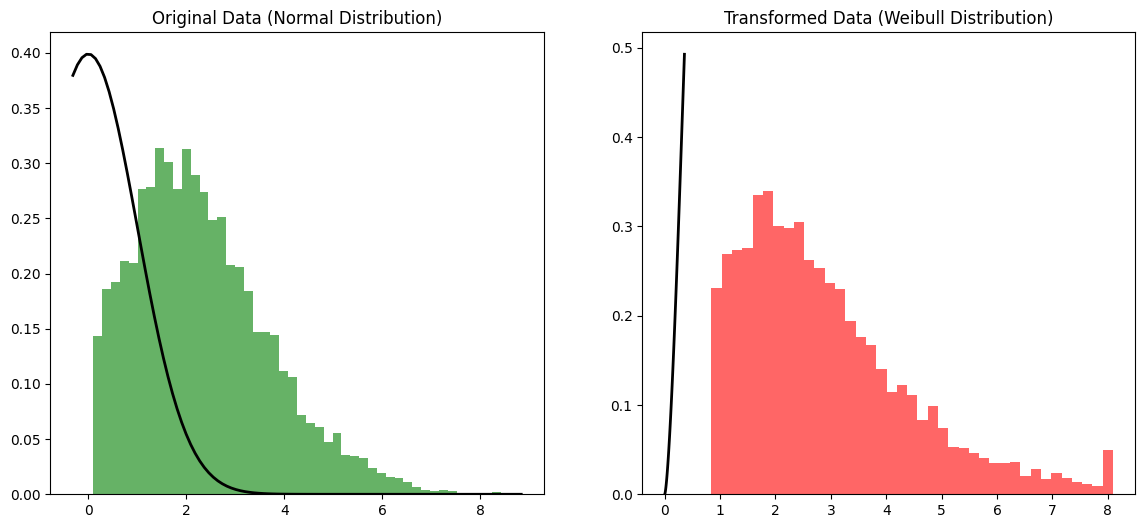

In [265]:
import scipy.stats as stats


# Function to perform memoryless transformation
def memoryless_transformation(x, mu, sigma, desired_dist):
    # Step 1: Compute the CDF of the Normal distribution
    phi_x = stats.norm.cdf(x, loc=mu, scale=sigma)
    phi_x = np.clip(phi_x, 1e-10, 1 - 1e-10)
    # Step 2: Compute the inverse CDF (quantile function) of the desired distribution
    y = desired_dist.ppf(phi_x)
    
    return y

np.random.seed(42)


# Define parameters for the normal distribution
mu = 0
sigma = 1

# Define the desired distribution (e.g., Weibull distribution)
desired_dist = stats.weibull_min(c=2.5)
hourly_avg_df['U10_t']= memoryless_transformation(hourly_avg_df['U10'], mu, sigma, desired_dist)
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(hourly_avg_df['U10'], bins='fd', density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x_plot = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x_plot, mu, sigma)
plt.plot(x_plot, p, 'k', linewidth=2)
plt.title("Original Data (Normal Distribution)")

plt.subplot(122)
plt.hist(y, bins='fd', density=True, alpha=0.6, color='r')
ymin, ymax = plt.ylim()
y_plot = np.linspace(ymin, ymax, 100)
q = desired_dist.pdf(y_plot)
plt.plot(y_plot, q, 'k', linewidth=2)
plt.title("Transformed Data (Weibull Distribution)")

plt.show()

In [266]:
from statsmodels.graphics.tsaplots import plot_acf, acf, plot_pacf
from scipy.optimize import curve_fit
def exp_decay(x,a):
    return np.exp(-a * x)

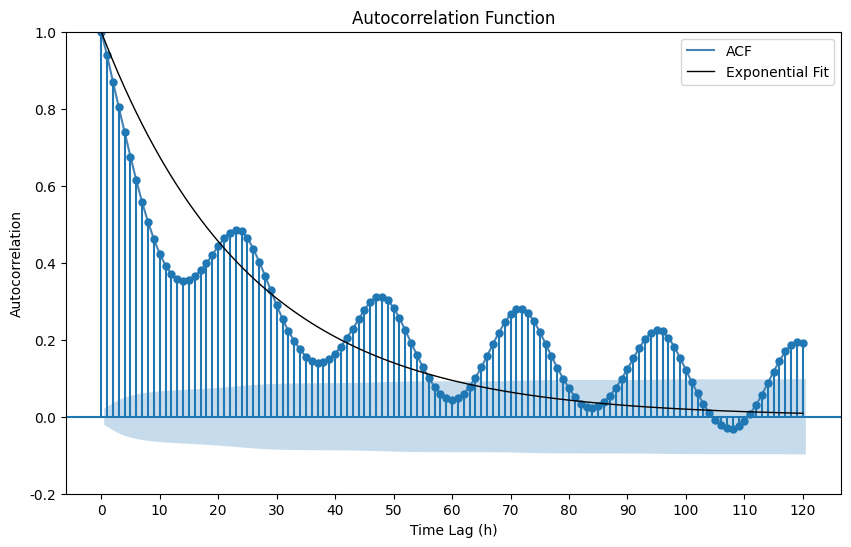

In [267]:
lags=120
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(hourly_avg_df['U10_t'], ax=ax, lags=lags,use_vlines=True, missing='drop',zorder=2)
plt.plot(ax.lines[-1].get_ydata(),zorder=1, color='steelblue',label='ACF')
#plt.acorr(hourly_avg_df['U10'], maxlags=120,usevlines=True)
#pd.plotting.autocorrelation_plot(hourly_avg_df['U10'],ax=ax) 
ax.set_xticks(range(0, lags+1, 10))
ax.set_xticklabels(range(0, lags+1, 10))

# Customize y-axis ticks
ax.set_ylim(-0.2,1)
ax.set_yticks(np.arange(-0.2, 1.2, 0.2))
ax.set_yticklabels(np.round(np.arange(-0.2, 1.2, 0.2),2))
plt.title('Autocorrelation Function')
acf_values=acf(hourly_avg_df['U10_t'], nlags=lags,missing='drop' )#ax.lines[-1].get_ydata()
lags = np.arange(len(acf_values))
popt, pcov = curve_fit(exp_decay, lags, acf_values,p0=0.05,nan_policy= 'omit', bounds=(0,1))
ax.plot(lags, exp_decay(lags, *popt), 'k-', lw=1, label='Exponential Fit')

plt.xlabel('Time Lag (h)')
plt.ylabel('Autocorrelation')
plt.legend()

plt.show()

In [173]:
hourly_avg_df.to_csv('horly_avg_data.csv')

In [288]:
popt, pcov

(array([0.03809543]), array([[3.12674531e-06]]))

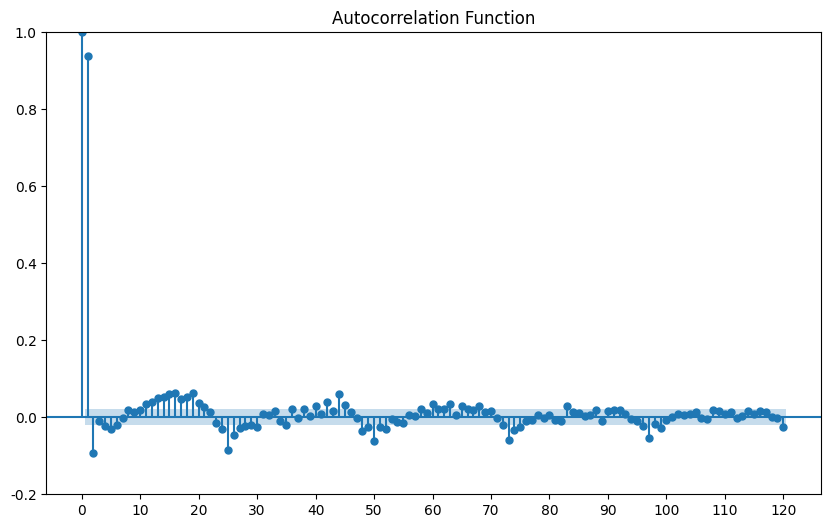

In [301]:
fig, ax = plt.subplots(figsize=(10, 6))
a=plot_pacf(hourly_avg_df['U10'].dropna(), ax=ax, lags=120,use_vlines=True,zorder=2)
# plt.plot(ax.lines[-1].get_ydata(),zorder=1)
#plt.acorr(hourly_avg_df['U10'], maxlags=120,usevlines=True)
#pd.plotting.autocorrelation_plot(hourly_avg_df['U10'],ax=ax) 
ax.set_xticks(range(0, 121, 10))
ax.set_xticklabels(range(0, 121, 10))

# Customize y-axis ticks
ax.set_ylim(-0.2,1)
ax.set_yticks(np.arange(-0.2, 1.2, 0.2))
ax.set_yticklabels(np.round(np.arange(-0.2, 1.2, 0.2),2))
plt.title('Autocorrelation Function')
plt.show()

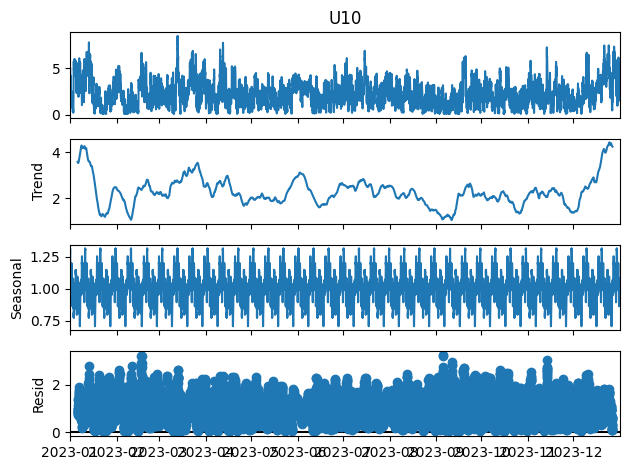

In [255]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is a pandas DataFrame with a datetime index and a column 'wind_speed'

# Perform seasonal decomposition
result = seasonal_decompose(hourly_avg_df['U10'].dropna(), model='multiplicative', period=240) # Adjust period as necessary

# Plot the decomposition
result.plot()
plt.show()

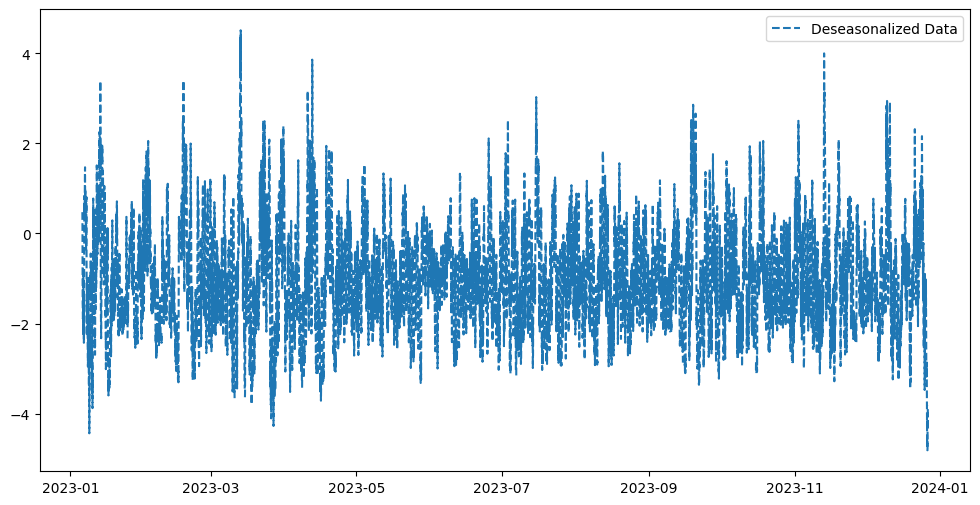

In [256]:
hourly_avg_df['deseasonalized'] = hourly_avg_df['U10'] - result.trend
hourly_avg_df['deseasonalized'] = hourly_avg_df['deseasonalized'] - result.seasonal

# Plot the original and deseasonalized data
plt.figure(figsize=(12, 6))
# plt.plot(hourly_avg_df['U10'], label='Original Data')
plt.plot(hourly_avg_df['deseasonalized'], label='Deseasonalized Data', linestyle='--')
plt.legend()
plt.show()

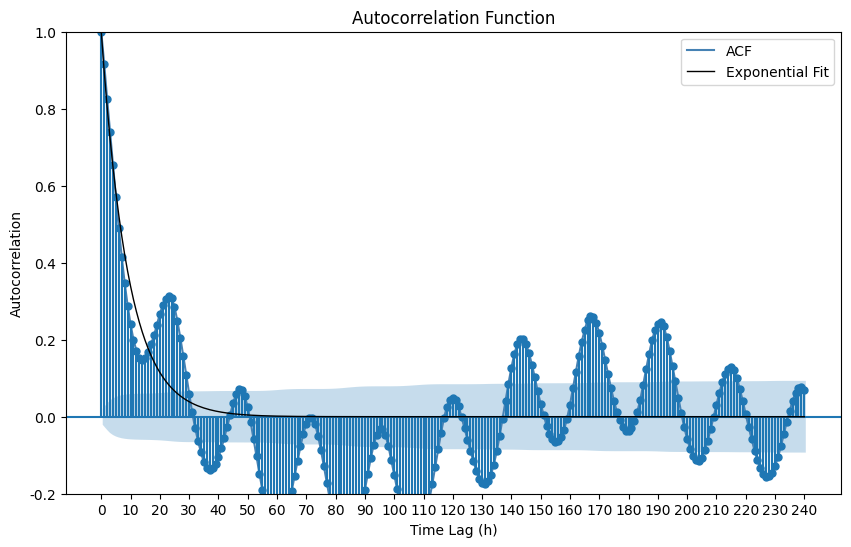

In [258]:
lags=240
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(hourly_avg_df['deseasonalized'], ax=ax, lags=lags,use_vlines=True, missing='drop',zorder=2)
plt.plot(ax.lines[-1].get_ydata(),zorder=1, color='steelblue',label='ACF')
#plt.acorr(hourly_avg_df['U10'], maxlags=120,usevlines=True)
#pd.plotting.autocorrelation_plot(hourly_avg_df['U10'],ax=ax) 
ax.set_xticks(range(0, lags+1, 10))
ax.set_xticklabels(range(0, lags+1, 10))

# Customize y-axis ticks
ax.set_ylim(-0.2,1)
ax.set_yticks(np.arange(-0.2, 1.2, 0.2))
ax.set_yticklabels(np.round(np.arange(-0.2, 1.2, 0.2),2))
plt.title('Autocorrelation Function')
acf_values=acf(hourly_avg_df['deseasonalized'], nlags=lags,missing='drop' )#ax.lines[-1].get_ydata()
lags = np.arange(len(acf_values))
popt, pcov = curve_fit(exp_decay, lags, acf_values,p0=0.05,nan_policy= 'omit', bounds=(0,1))
ax.plot(lags, exp_decay(lags, *popt), 'k-', lw=1, label='Exponential Fit')

plt.xlabel('Time Lag (h)')
plt.ylabel('Autocorrelation')
plt.legend()

plt.show()

In [238]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(hourly_avg_df['U10'], order=(1, 0, 1))  # Example order, should be determined based on ACF/PACF
model_fit = model.fit()

# Use the residuals as the prewhitened data
hourly_avg_df['pre'] = model_fit.resid

c:\Users\athan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\athan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\athan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


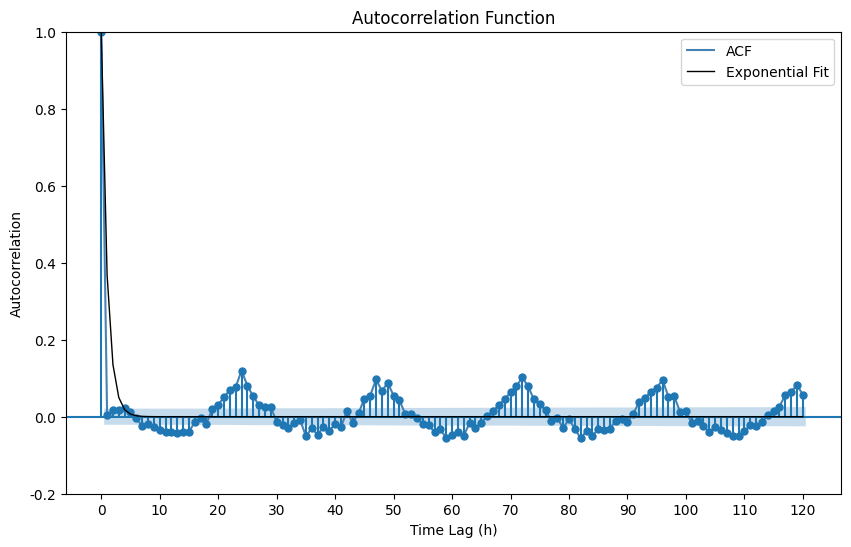

In [239]:
lags=120
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(hourly_avg_df['pre'], ax=ax, lags=lags,use_vlines=True, missing='drop',zorder=2)
plt.plot(ax.lines[-1].get_ydata(),zorder=1, color='steelblue',label='ACF')
#plt.acorr(hourly_avg_df['U10'], maxlags=120,usevlines=True)
#pd.plotting.autocorrelation_plot(hourly_avg_df['U10'],ax=ax) 
ax.set_xticks(range(0, lags+1, 10))
ax.set_xticklabels(range(0, lags+1, 10))

# Customize y-axis ticks
ax.set_ylim(-0.2,1)
ax.set_yticks(np.arange(-0.2, 1.2, 0.2))
ax.set_yticklabels(np.round(np.arange(-0.2, 1.2, 0.2),2))
plt.title('Autocorrelation Function')
acf_values=acf(hourly_avg_df['pre'], nlags=lags,missing='drop' )#ax.lines[-1].get_ydata()
lags = np.arange(len(acf_values))
popt, pcov = curve_fit(exp_decay, lags, acf_values,p0=0.05,nan_policy= 'omit', bounds=(0,1))
ax.plot(lags, exp_decay(lags, *popt), 'k-', lw=1, label='Exponential Fit')

plt.xlabel('Time Lag (h)')
plt.ylabel('Autocorrelation')
plt.legend()

plt.show()

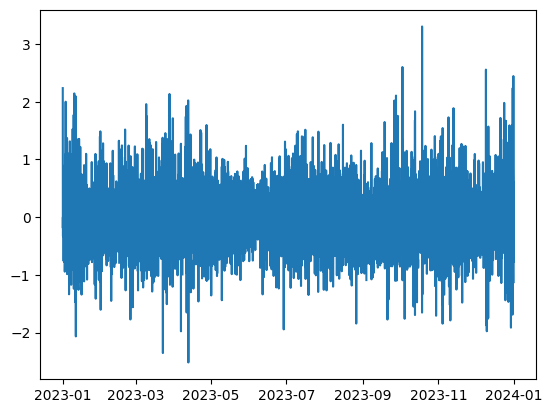

In [240]:
plt.plot(hourly_avg_df['pre'] )

In [269]:
from scipy.stats import weibull_min
sample_mean = hourly_avg_df['U10'].mean()
sample_variance = hourly_avg_df['U10'].var()

# Estimate the Weibull parameters using the method of moments
def weibull_params(sample_mean, sample_variance):
    # Method of moments estimates for Weibull distribution
    c = (sample_variance / (sample_mean**2))**(-1/2)
    scale = sample_mean / np.random.gamma(1 + 1/c)
    return c, scale

shape, scale = weibull_params(sample_mean, sample_variance)

# Print the estimated parameters
print(f"Estimated shape parameter (k): {shape}")
print(f"Estimated scale parameter (lambda): {scale}")


Estimated shape parameter (k): 1.6930642959303084
Estimated scale parameter (lambda): 1.2219410879497126


Estimated shape parameter (k): 1.7471630503855096
Estimated scale parameter (lambda): 2.6073601628663208


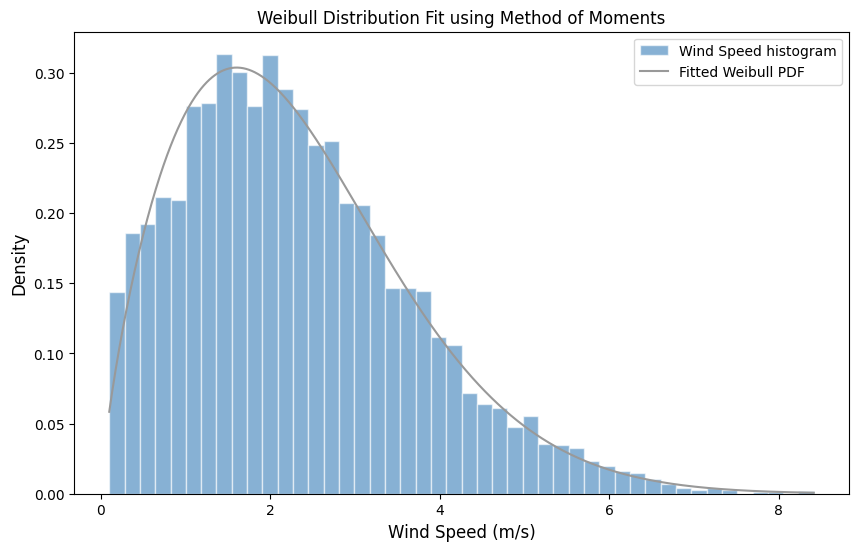

In [291]:
import numpy as np
from scipy.special import gamma
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Sample data (replace with your data)
data = hourly_avg_df['U10']

# Step 1: Calculate sample mean and variance
sample_mean = np.mean(data)
sample_variance = np.var(data)

# Step 2: Define the equations for the Method of Moments
def equations(p):
    k, lambda_ = p
    mean_eq = lambda_ * gamma(1 + 1/k) - sample_mean
    variance_eq = (lambda_**2) * (gamma(1 + 2/k) - (gamma(1 + 1/k))**2) - sample_variance
    return (mean_eq, variance_eq)

# Step 3: Initial guess for k and lambda
initial_guess = (1.0, 1.0)

# Step 4: Solve the equations
k, lambda_ = fsolve(equations, initial_guess)

print(f"Estimated shape parameter (k): {k}")
print(f"Estimated scale parameter (lambda): {lambda_}")

# Step 5: Plot the fitted Weibull distribution with the data histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins='fd', density=True, alpha=0.6, color='#377eb8', label='Wind Speed histogram',ec='white')

# Weibull PDF with estimated parameters
x = np.linspace(min(data), max(data), 1000)
pdf = (k / lambda_) * (x / lambda_)**(k - 1) * np.exp(-(x / lambda_)**k)
plt.plot(x, pdf, linewidth=1.5, label='Fitted Weibull PDF', color='#999999')

plt.xlabel('Wind Speed (m/s)', size=12)
plt.ylabel('Density', size=12)
plt.legend()
plt.title('Weibull Distribution Fit using Method of Moments')
plt.show()


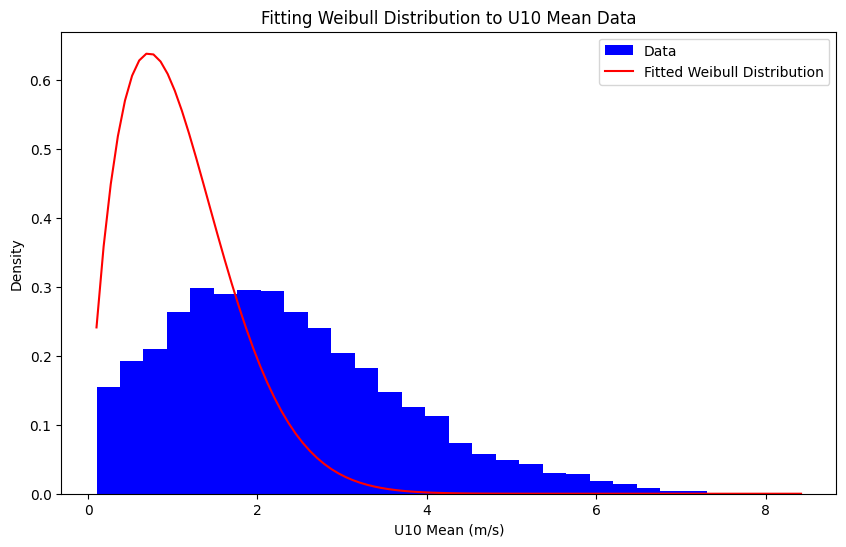

In [274]:
plt.figure(figsize=(10, 6))
plt.hist(hourly_avg_df['U10'], density=True, bins=30, color='blue', label='Data')

# Generate values from the fitted Weibull distribution
x = np.linspace(hourly_avg_df['U10'].min(), hourly_avg_df['U10'].max(), 100)
y = weibull_min.pdf(x, shape, scale=scale)

plt.plot(x, y, 'r-', label='Fitted Weibull Distribution')

plt.xlabel('U10 Mean (m/s)')
plt.ylabel('Density')
plt.title('Fitting Weibull Distribution to U10 Mean Data')
plt.legend()
plt.show()